# ==============================================
# Parte I: Eigenfaces para Reconocimiento Facial
# Carga del conjunto de entrenamiento y prueba
# ==============================================

In [ ]:
 
#!pip install imageio
#!pip install torch torchvision imageio scikit-learn matplotlib numpy

   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.3 MB 5.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 5.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 5.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 5.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 5.7 MB/s eta 0:00:01
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --------- ------------------------------ 1.0/4.3 MB 781.7 kB/s eta 0:00:05
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import os
import numpy as np
import imageio.v2 as imageio
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import matplotlib.cm as cm

### 1. Load the Training and Test Sets

In [17]:
# Ruta base del proyecto
base_dir = r"C:\Users\Hp\Desktop\ENEI-2025-ML2-Tarea2-main"

# Archivos de texto con rutas y etiquetas
train_txt = os.path.join(base_dir, "data", "train.txt")
test_txt = os.path.join(base_dir, "data", "test.txt")

# Carpeta donde están las imágenes
images_dir = os.path.join(base_dir, "data", "images")

In [18]:
# ---------- Cargar datos de entrenamiento ----------
train_labels, train_data = [], []
with open(train_txt, 'r') as f:
    for line in f:
        ruta_relativa, etiqueta = line.strip().split()
        ruta_imagen = os.path.join(images_dir, os.path.basename(ruta_relativa))  # combina ruta base + nombre imagen
        imagen = imageio.imread(ruta_imagen)
        train_data.append(imagen.reshape(2500,))
        train_labels.append(int(etiqueta))

train_data = np.array(train_data, dtype=float)
train_labels = np.array(train_labels, dtype=int)

print("Forma de train_data:", train_data.shape)
print("Forma de train_labels:", train_labels.shape)

Forma de train_data: (540, 2500)
Forma de train_labels: (540,)


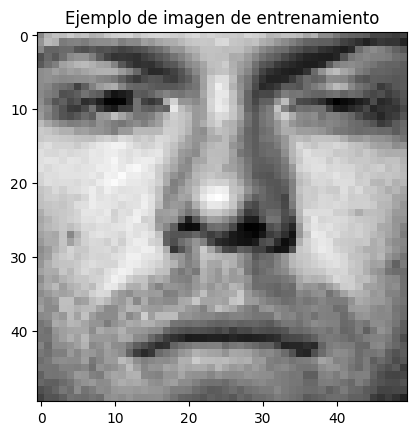

In [19]:
# Mostrar una imagen de ejemplo del entrenamiento
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Ejemplo de imagen de entrenamiento")
plt.show()

In [20]:
# ---------- Cargar datos de prueba ----------
test_labels, test_data = [], []
with open(test_txt, 'r') as f:
    for line in f:
        ruta_relativa, etiqueta = line.strip().split()
        ruta_imagen = os.path.join(images_dir, os.path.basename(ruta_relativa))
        imagen = imageio.imread(ruta_imagen)
        test_data.append(imagen.reshape(2500,))
        test_labels.append(int(etiqueta))

test_data = np.array(test_data, dtype=float)
test_labels = np.array(test_labels, dtype=int)

print("Forma de test_data:", test_data.shape)
print("Forma de test_labels:", test_labels.shape)

Forma de test_data: (100, 2500)
Forma de test_labels: (100,)


In [21]:
# ---------- Cargar datos de prueba ----------
test_labels, test_data = [], []
with open(test_txt, 'r') as f:
    for line in f:
        ruta_relativa, etiqueta = line.strip().split()
        ruta_imagen = os.path.join(images_dir, os.path.basename(ruta_relativa))
        imagen = imageio.imread(ruta_imagen)
        test_data.append(imagen.reshape(2500,))
        test_labels.append(int(etiqueta))

test_data = np.array(test_data, dtype=float)
test_labels = np.array(test_labels, dtype=int)

print("Forma de test_data:", test_data.shape)
print("Forma de test_labels:", test_labels.shape)

Forma de test_data: (100, 2500)
Forma de test_labels: (100,)


### 2. Average Face

Forma del vector de cara promedio: (2500,)


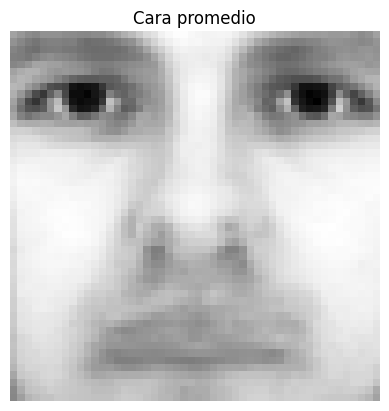

In [22]:
# ---------- Calcular la cara promedio ----------
cara_promedio = np.mean(train_data, axis=0)  # Promedio por columnas (cada píxel)

print("Forma del vector de cara promedio:", cara_promedio.shape)

# ---------- Mostrar la cara promedio ----------
plt.imshow(cara_promedio.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Cara promedio")
plt.axis('off')
plt.show()

### 3.Mean Subtraction

In [23]:
# ---------- Resta de la cara promedio (centrado de datos) ----------

# Restar μ (cara promedio) de cada imagen de entrenamiento
X_demeaned = train_data - cara_promedio

# Hacer lo mismo para el conjunto de prueba
Xtest_demeaned = test_data - cara_promedio

print("Forma del conjunto de entrenamiento centrado:", X_demeaned.shape)
print("Forma del conjunto de prueba centrado:", Xtest_demeaned.shape)

Forma del conjunto de entrenamiento centrado: (540, 2500)
Forma del conjunto de prueba centrado: (100, 2500)


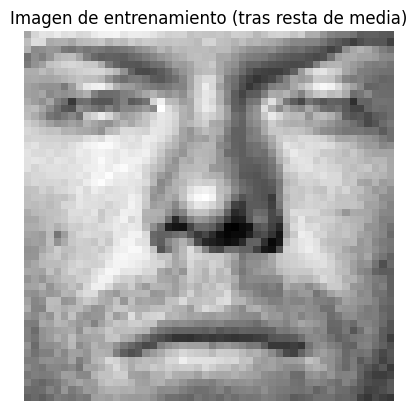

In [24]:
# ---------- Mostrar una imagen de ejemplo después de restar la media ----------
plt.imshow(X_demeaned[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Imagen de entrenamiento (tras resta de media)")
plt.axis('off')
plt.show()

### 4. Eigenfaces(Rostros propios)

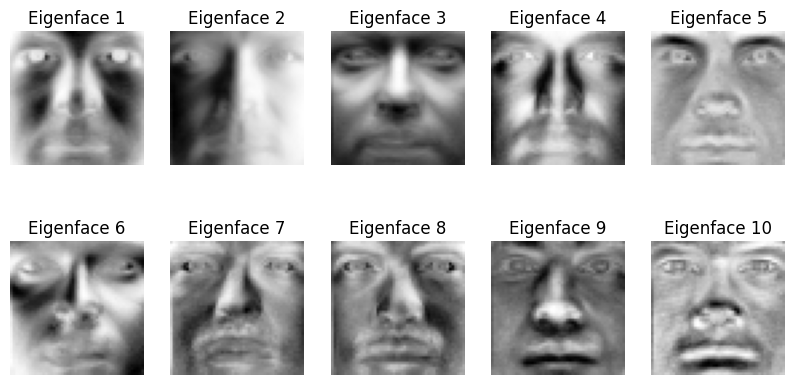

In [25]:
# Calcular la matriz de covarianza reducida
C = np.dot(X_demeaned.T, X_demeaned)

# Descomposición en valores propios
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Ordenar los vectores propios en orden descendente (mayor a menor valor propio)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Tomar solo la parte real (por si hay números complejos)
eigenvectors = np.real(eigenvectors)

# Mostrar las primeras 10 caras propias
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(eigenvectors[:, i].reshape(50, 50), cmap=cm.Greys_r)
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')
plt.show()

### 5. Eigenface Features

In [26]:
def calcular_caracteristicas(X, Xtest, eigenfaces, r):
    """
    Calcula las características (proyecciones) de las imágenes sobre las r primeras caras propias.
    
    Parámetros:
        X: matriz de entrenamiento (centrada)
        Xtest: matriz de prueba (centrada)
        eigenfaces: matriz de vectores propios (cada columna = una cara propia)
        r: número de caras propias a usar

    Retorna:
        F: características del entrenamiento
        Ftest: características del conjunto de prueba
    """
    # Seleccionamos las r primeras caras propias
    V_r = eigenfaces[:, :r]

    # Proyectamos los datos en el subespacio de las r caras propias
    F = np.dot(X, V_r)          # (540 x 2500) * (2500 x r) → (540 x r)
    Ftest = np.dot(Xtest, V_r)  # (100 x 2500) * (2500 x r) → (100 x r)

    return F, Ftest


# Ejemplo de uso (por ejemplo con r = 50)
r = 50
F, Ftest = calcular_caracteristicas(X_demeaned, Xtest_demeaned, eigenvectors, r)

print("Forma de F (entrenamiento):", F.shape)
print("Forma de Ftest (prueba):", Ftest.shape)


Forma de F (entrenamiento): (540, 50)
Forma de Ftest (prueba): (100, 50)


### 6. Face Recognition

In [27]:
# Función para entrenar y evaluar con un valor dado de r
def evaluar_modelo(r, X_train, X_test, y_train, y_test, eigenfaces):
    # Seleccionar las r primeras caras propias
    V_r = eigenfaces[:, :r]

    # Calcular las características (proyecciones)
    F = np.dot(X_train, V_r)
    Ftest = np.dot(X_test, V_r)

    # Entrenar modelo de regresión logística (sin intercepto)
    modelo = LogisticRegression(max_iter=1000, fit_intercept=False)
    modelo.fit(F, y_train)

    # Evaluar en el conjunto de prueba
    y_pred = modelo.predict(Ftest)
    acc = accuracy_score(y_test, y_pred)
    return acc


In [28]:
# Evaluar para r = 10
r = 10
acc_r10 = evaluar_modelo(r, X_demeaned, Xtest_demeaned, train_labels, test_labels, eigenvectors)
print(f"Precisión con r = {r}: {acc_r10:.4f}")

Precisión con r = 10: 0.7600


In [29]:
# Repetir para r = 1 hasta 200 y guardar las precisiones
r_values = range(1, 201)
accuracies = []

for r in r_values:
    acc = evaluar_modelo(r, X_demeaned, Xtest_demeaned, train_labels, test_labels, eigenvectors)
    accuracies.append(acc)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-

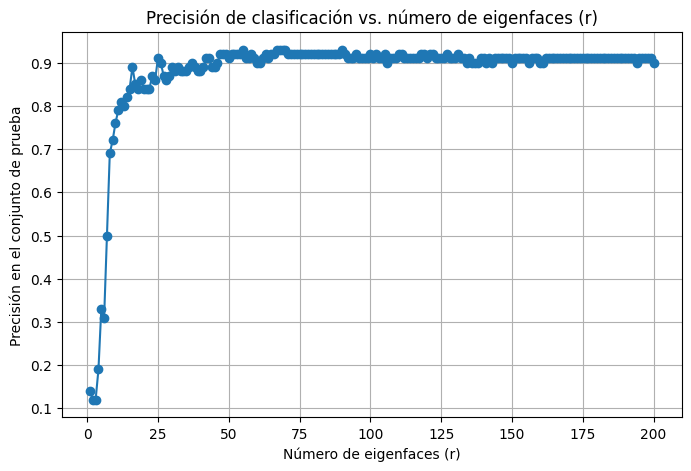

In [30]:
# Graficar precisión en función de r
plt.figure(figsize=(8, 5))
plt.plot(r_values, accuracies, marker='o')
plt.title("Precisión de clasificación vs. número de eigenfaces (r)")
plt.xlabel("Número de eigenfaces (r)")
plt.ylabel("Precisión en el conjunto de prueba")
plt.grid(True)
plt.show()

### 7. Low-Rank Reconstruction Loss

Fórmula teórica:

X' = F ⋅ (top r eigenfaces)

d(X, X') = tr( (X - X')ᵀ ⋅ (X - X') )

Donde:
- X  : matriz original (demeaned)
- X' : reconstrucción usando r componentes
- d  : distancia de Frobenius promedio

In [31]:
# Rango de valores de r (número de caras propias)
r_values = range(1, 201)

In [32]:
# Lista para guardar la distancia promedio de Frobenius
distancias = []

In [33]:
# Calcular la reconstrucción y la pérdida para cada r
for r in r_values:
    # Seleccionamos las primeras r caras propias
    Vr = eigenvectors[:, :r]
    
    # Calculamos las características F (ya sin la media)
    F = X_demeaned @ Vr
    
    # Reconstruimos X' = F * Vr^T
    X_reconstruido = F @ Vr.T
    
    # Calculamos la distancia de Frobenius promedio
    diferencia = X_demeaned - X_reconstruido
    distancia = np.sqrt(np.trace(diferencia.T @ diferencia)) / X_demeaned.shape[0]
    distancias.append(distancia)

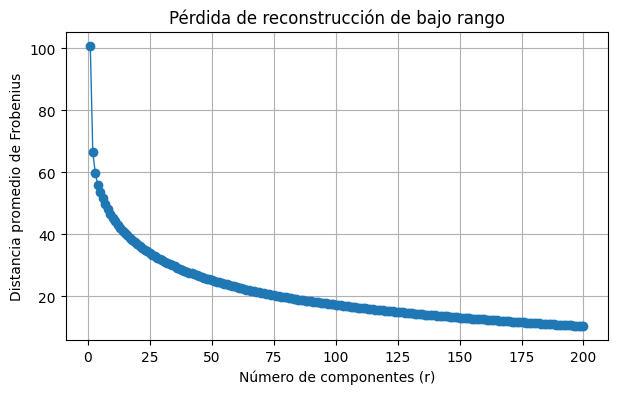

In [34]:
# Graficamos la distancia promedio vs número de componentes
plt.figure(figsize=(7,4))
plt.plot(r_values, distancias, marker='o', linewidth=1)
plt.xlabel("Número de componentes (r)")
plt.ylabel("Distancia promedio de Frobenius")
plt.title("Pérdida de reconstrucción de bajo rango")
plt.grid(True)
plt.show()

# =============================================
# PARTE II: Redes Neuronales Convolucionales (CNN)
# =============================================

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.64MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 320kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.59MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.70MB/s]


Época [1/5] - Pérdida entrenamiento: 0.2234 - Pérdida prueba: 0.0665 - Precisión: 97.88%
Época [2/5] - Pérdida entrenamiento: 0.0594 - Pérdida prueba: 0.0478 - Precisión: 98.50%
Época [3/5] - Pérdida entrenamiento: 0.0406 - Pérdida prueba: 0.0361 - Precisión: 98.75%
Época [4/5] - Pérdida entrenamiento: 0.0299 - Pérdida prueba: 0.0306 - Precisión: 98.97%
Época [5/5] - Pérdida entrenamiento: 0.0240 - Pérdida prueba: 0.0325 - Precisión: 99.05%


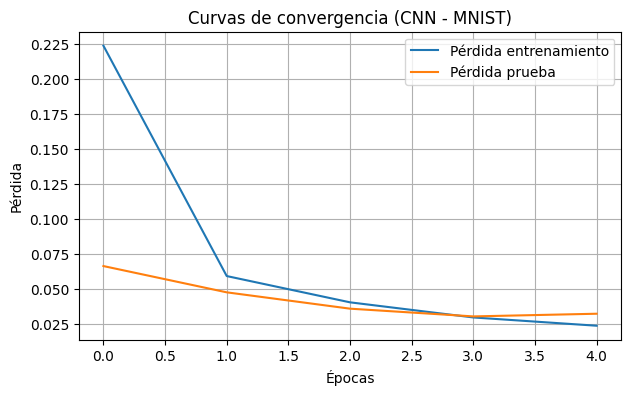

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# =============================================
# 1. Cargar el conjunto de datos MNIST
# =============================================

transform = transforms.ToTensor()

mnist_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
mnist_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=1000, shuffle=False)

# =============================================
# 2. Definir la arquitectura de la CNN
# (Basada en el ejemplo clásico de LeNet)
# =============================================

class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Capa conv + ReLU + pooling
        x = self.pool(self.relu(self.conv2(x)))  # Capa conv + ReLU + pooling
        x = x.view(-1, 32 * 7 * 7)              # Aplanar
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)                         # Salida final
        return x

# =============================================
# 3. Inicializar red, función de pérdida y optimizador
# =============================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_MNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# =============================================
# 4. Entrenamiento de la red
# =============================================

epochs = 5
train_losses, test_losses = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    # Evaluar en el conjunto de prueba
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    acc = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))

    print(f"Época [{epoch+1}/{epochs}] - "
          f"Pérdida entrenamiento: {train_losses[-1]:.4f} - "
          f"Pérdida prueba: {test_losses[-1]:.4f} - "
          f"Precisión: {acc:.2f}%")

# =============================================
# 5. Graficar curvas de convergencia
# =============================================

plt.figure(figsize=(7,4))
plt.plot(train_losses, label='Pérdida entrenamiento')
plt.plot(test_losses, label='Pérdida prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de convergencia (CNN - MNIST)')
plt.legend()
plt.grid(True)
plt.show()

# Assignment 2 — Reporte de Resultados  
**Integrantes:** 
- Joel Mateo Manrique Velasquez
- Luis Enrique Perez Ramos
- Ginno Jacinto Castro  

**Fecha:** 04/11/2025

---

## Parte 1 · Eigenfaces (PCA) para reconocimiento facial

Trabajamos con 540 imágenes de entrenamiento y 100 de prueba (50×50 píxeles; matrices 540×2500 y 100×2500). Calculamos la **cara promedio** y centramos ambos conjuntos restándole esa media. A partir de X^T X obtuvimos las **eigenfaces** y proyectamos cada imagen en las primeras r componentes para construir las características; luego clasificamos con **regresión logística** sin intercepto.

En clasificación, con **r=10** logramos **accuracy = 0.7600**. La curva *Precisión vs r* crece con rapidez y se **estabiliza entre r ≈ 60–80**, donde la exactitud se mantiene alrededor de **0.91–0.93**; a partir de ahí el beneficio adicional es mínimo e incluso puede decrecer levemente.

En reconstrucción de bajo rango, el error ||X - X'||_F **disminuye de forma monótona** al aumentar r: de ~**101** con r=1, ~**57** con r=10 hasta ~**11** con r=200.

**Conclusión:** Para reconocimiento recomendamos **r ≈ 60–80** (buen equilibrio entre desempeño y dimensión). Si se prioriza reconstrucción visual, conviene usar r más altos.

**Figuras generadas:**
- Cara promedio
- Precisión de clasificación vs r
- Error de reconstrucción (Frobenius) vs r

---

## Parte 2 · CNN en MNIST

Usamos **MNIST** (28×28, 10 clases) con `ToTensor()` (escala [0,1]). Entrenamos una **CNN tipo LeNet** con dos bloques *Conv–ReLU–MaxPool* seguidos de capas densas. Configuración: **5 épocas**, **CrossEntropy**, **Adam (LR=1e−3)**, dispositivo **CPU**.

El entrenamiento fue estable: la pérdida de prueba bajó de **0.0665** a **0.0306** en las primeras **4** épocas y subió levemente a **0.0325** en la **5** (indicio de **sobreajuste leve**). La exactitud de prueba avanzó **97.88 → 98.50 → 98.75 → 98.97 → 99.05%**, alcanzando **99.05%** al final.

**Conclusión:** Una CNN sencilla alcanza ~**99%** en MNIST con convergencia rápida. El pequeño sobreajuste observado al final podría mitigarse con BatchNorm/Dropout o early stopping.

**Figura generada:**
- Curvas de convergencia (pérdida de entrenamiento vs pérdida de prueba)

---